## Business Problem Understanding
E-Commerce secara umum dapat diartikan sebagai transaksi jual beli secara elektronik melalui media internet. Selain itu, E-commerce juga dapat diartikan sebagai suatu proses berbisnis dengan memakai teknologi elektronik yang menghubungkan antara perusahaan, konsumen dan masyarakat dalam bentuk transaksi elektronik dan pertukaran atau penjualan barang, servis, dan informasi secara elektronik.

##### Problem statement
Dalam penjualan ecommerce barang yang dibeli dan juga sampai ke customer terkadang tidak sesuai dengan yang diharapkan customer itu sendiri, bisa terkadang barang rusak, barang tidak sesuai pesanan ataupun barang terlambat dalam pengiriman. Perusahaan berusaha memberikan pelayanan yang terbaik agar hal seperti itu tidak dapat terjadi dengan menerapkan beberapa sistem yang dapat menguntungkan dalam perusahaan maupun customer.

Adanya fitur seperti memberikan cashback dan pemberian feedback terhadap barang yang dijual cukup memberikan informasi mengenai kesan customer terhadap perusahaan.

##### Tujuan Project
Membuat model klasifikasi dengan mencari parameter yang tepat dalam penggunaan untuk perusahaan retail online (E-commerce) dengan mengetahui pelanggan yang akan churn, sehingga mereka dapat mendekati customer untuk menawarkan beberapa promo.

##### Analytic Approach
Dalam mengatasi kasus ecommerce yang ingin memberikan pelayanan terbaik mereka dengan mencari tau target yang tepat untuk memberikan promo ataupun cashback ke customer dengan model klasifikasi. Tahapan yang dilakukan terdapat 3 hal
1. Pemahaman Dataset : Tahap ini ialah mempelajari dataset yang tersedia, termasuk variabel yang ada didalamnya dan bagaimana perusahaan ini dapat memberikan pengaruh terhadap pelanggan.
2. Data Preparing : Proses untuk mengindentifikasi dan memperbaiki jika adanya nilai hiang ataupun data yang tidak valid
3. Pemilihan Model Machine Learning : Untuk project saya memilih menggunakan 2 model yaitu Model Knn dan Decision Tree. Model Evaluasi yang dilakukan menggunakan 2 metode , yaitu metode splitting data dan Cross Validation data

## Data Understanding
Dataset : Kumpulan data tersebut milik perusahaan E-commerce online terkemuka. Berikut Informasi mengenai data :

- Tenure: Masa berlangganan di perusahaan.
- WarehouseToHome: Jarak antara gudang ke rumah customer.
- NumberOfDeviceRegistered: Jumlah total perangkat yang terdaftar pada customer tertentu.
- PreferedOrderCat: Kategori pesanan pilihan customer dalam sebulan terakhir.
- SatisfactionScore: Skor memuaskan customer dalam pelayanan.
- MaritalStatus: Status perkawinan customer.
- NumberOfAddress: Jumlah total yang ditambahkan pada customer tertentu.
- Complaint: Keluhan apa pun telah diajukan dalam sebulan terakhir.
- DaySinceLastOrder: Hari sejak pemesanan terakhir oleh customer.
- CashbackAmount: Rata-rata cashback bulan lalu
- Churn: Churn flag.



In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
ecommerce = pd.read_csv('data_ecommerce_customer_churn.csv')
ecommerce.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
ecommerce.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

### Data PreProcessing

In [4]:
ecommerce.shape

(3941, 11)

In [5]:
ecommerce.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [6]:
ecommerce.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [7]:
ecommerce.dropna(axis=0)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [8]:
ecommerce.duplicated().sum()

671

In [9]:
ecommerce.drop_duplicates()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [10]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [11]:
# Mengubah nilai dan tipe data dari string (kategorik) menjadi integer (numerik) pada kolom Churn
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
ecommerce = ecommerce.apply(le.fit_transform)
ecommerce.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15,24,3,2,2,2,1,0,7,517,0
1,7,20,3,3,0,1,1,0,7,286,0
2,27,8,2,2,0,1,4,0,7,1252,0
3,20,20,3,0,2,0,6,0,22,1969,0
4,30,10,3,5,3,2,7,0,8,2326,0


### Data Splitting

In [12]:
#fitur
x = ecommerce [['NumberOfDeviceRegistered', 'PreferedOrderCat', 'Complain', 'SatisfactionScore']]
#target
y = ecommerce ['Churn']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

### Modelling 

Knn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
knn_test = knn.predict(x_test)
print(knn_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [18]:
print(classification_report(y_test, knn_test))
print('nilai akurasinya adalah ',accuracy_score(y_test, knn_test)*100)
print('nilai precision adalah ',precision_score(y_test, knn_test)*100)
print('nilai recall adalah ',recall_score(y_test, knn_test)*100)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       645
           1       0.55      0.25      0.34       144

    accuracy                           0.83       789
   macro avg       0.70      0.60      0.62       789
weighted avg       0.80      0.83      0.80       789

nilai akurasinya adalah  82.6362484157161
nilai precision adalah  55.38461538461539
nilai recall adalah  25.0


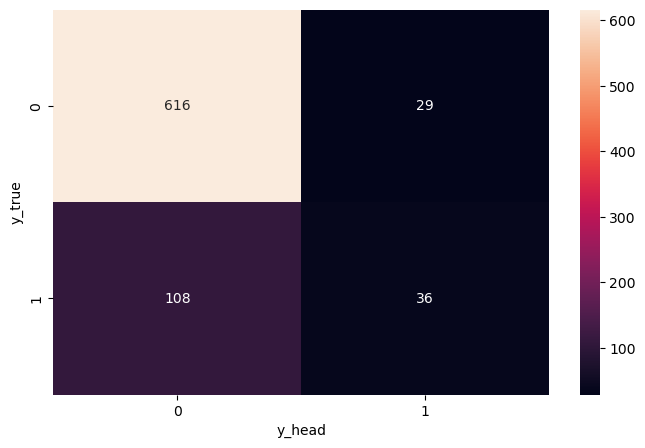

In [19]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, knn_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

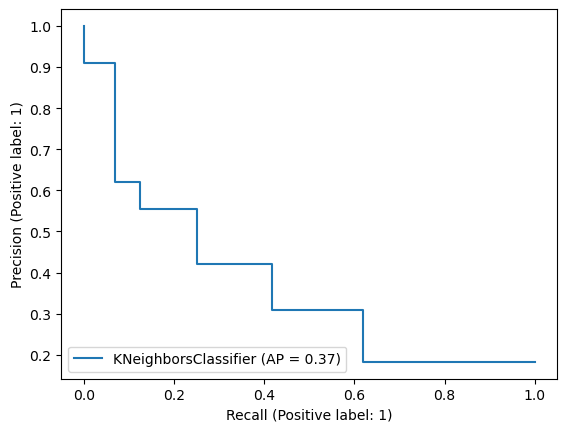

In [20]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(knn,x_test,y_test)

Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
dt_test = dt.predict(x_test)
print(dt_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
print(classification_report(y_test, dt_test))
print('nilai akurasinya adalah ',accuracy_score(y_test, dt_test)*100)
print('nilai precision adalah ',precision_score(y_test, dt_test)*100)
print('nilai recall adalah ',recall_score(y_test, dt_test)*100)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       645
           1       0.56      0.24      0.33       144

    accuracy                           0.83       789
   macro avg       0.70      0.60      0.62       789
weighted avg       0.80      0.83      0.80       789

nilai akurasinya adalah  82.6362484157161
nilai precision adalah  55.73770491803278
nilai recall adalah  23.61111111111111


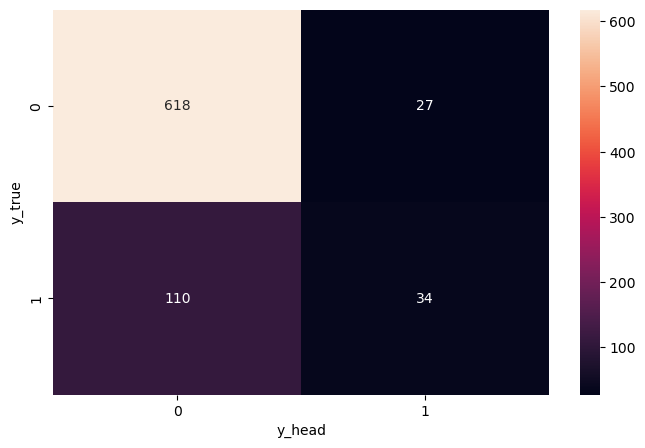

In [24]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dt_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

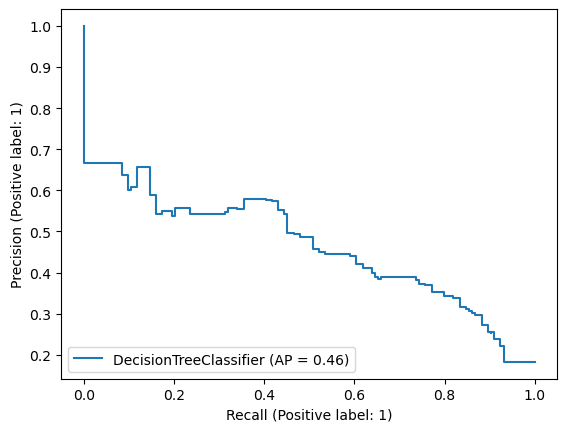

In [25]:
PrecisionRecallDisplay.from_estimator(dt,x_test,y_test)

#### Cross Validation KNN

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [27]:
skfold = StratifiedKFold(n_splits=5)

knn_cv = cross_val_score(knn,x_train,y_train, cv=skfold)
print('Akurasi Knn Cross Validation',knn_cv.mean()*100)

Akurasi Knn Cross Validation 82.86846275752774


In [28]:
knn_cv = cross_val_score(knn,x_train,y_train, cv=skfold,scoring='recall')
print('Recall Knn Cross Validation',knn_cv.mean()*100)

Recall Knn Cross Validation 24.71698113207547


In [29]:
knn_cv = cross_val_score(knn,x_train,y_train, cv=skfold,scoring='precision')
print('Precision Knn Cross Validation',knn_cv.mean()*100)

Precision Knn Cross Validation 48.710863213926785


#### Cross Validation Decision Tree

In [30]:
skfold = StratifiedKFold(n_splits=5)

dt_cv = cross_val_score(dt,x_train,y_train, cv=skfold)
print('Akurasi Decision Tree Cross Validation',dt_cv.mean()*100)

Akurasi Decision Tree Cross Validation 84.20089049883029


In [31]:
dt_cv = cross_val_score(knn,x_train,y_train, cv=skfold,scoring='recall')
print('Recall Decision Tree Cross Validation',dt_cv.mean()*100)

Recall Decision Tree Cross Validation 24.71698113207547


In [32]:
dt_cv = cross_val_score(knn,x_train,y_train, cv=skfold,scoring='precision')
print('Precision Decision Tree Cross Validation',dt_cv.mean()*100)

Precision Decision Tree Cross Validation 48.710863213926785


## Kesimpulan

Dalam hasil yang ditampilkan untuk kasus ecommerce, mengenai menentukan parameter yang tepat dalam pemberian promo pada customer churn. Terlihat pada model Decision Tree dan Knn terlihat hampir sama mengenai hasi akurasi dan presicion pada metode splitting data tetapi sedikit berbeda dalam recall yang ada. Dan dalam penggunaan Cross Validation juga memberikan perfoma yang cukup sama dengan metode sebelumnya.

### Rekomendasi
Untuk pengembang ecommerce lebih memperhatikan mengenai complain yang diberikan terhadap pelanggan. dan perlu memberikan detail yang lebih kompleks agar customer lebih mengetahui terhadap produk yang ingin mereka beli. Dan juga dalam barang perlu disesuaikan dengan kategori yang ada.

Untuk pengembangan model, perlu dilakukan upaya lebih lanjut untuk mengurangi overfitting, seperti dengan mengurangi kompleksitas model atau memperluas dataset. Memperhatikan fitur-fitur yang paling berpengaruh dalam pengembangan model selanjutnya.
